In [108]:
## Import reaquired libraries

import numpy as np
import pandas as pd
import time
import tensorflow as tf  
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [109]:
## Importing the data
df=pd.read_csv("BankNote_Authentication.csv")

In [110]:
df.shape  # shape of the data (totla 1372 rows, 5 columns)

(1372, 5)

In [111]:
df.info()   # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [112]:
df.head(-10) # first  & Last 5 columns of data

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.80730,-0.446990,0
1,4.545900,8.16740,-2.45860,-1.462100,0
2,3.866000,-2.63830,1.92420,0.106450,0
3,3.456600,9.52280,-4.01120,-3.594400,0
4,0.329240,-4.45520,4.57180,-0.988800,0
...,...,...,...,...,...
1357,-2.589900,-0.39110,0.93452,0.429720,1
1358,-1.011600,-0.19038,-0.90597,0.003003,1
1359,0.066129,2.49140,-2.94010,-0.621560,1
1360,-0.247450,1.93680,-2.46970,-0.805180,1


In [113]:
## checking null values in the dat

df.isnull().sum()  ## No Null values in our Data

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [114]:
## Percentage of Null Values in our data
df.isnull().sum().sort_values(ascending=False)/df.shape[0]   ## NO Null values in our data

variance    0.0
skewness    0.0
curtosis    0.0
entropy     0.0
class       0.0
dtype: float64

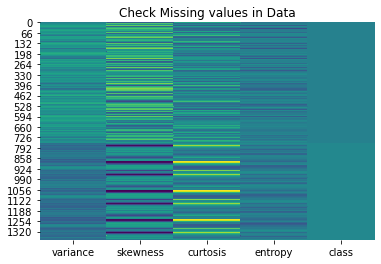

In [115]:
# Visualisation of Null Values 
import seaborn as sns

sns.heatmap(df, cbar=False , cmap="viridis")
plt.title("Check Missing values in Data")
plt.show()

# Exploratory data analysis

Histogram of all columns in Data

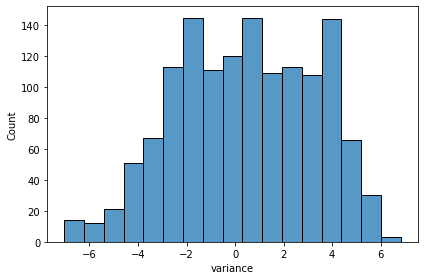

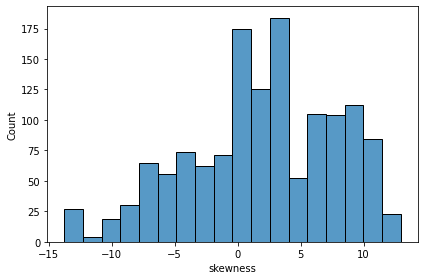

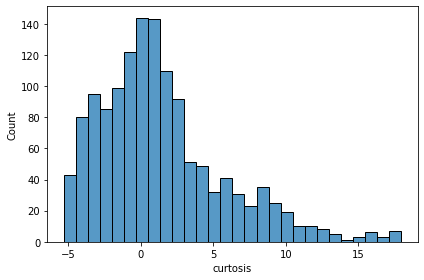

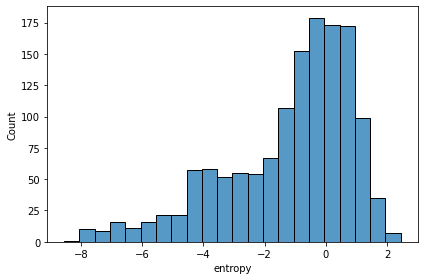

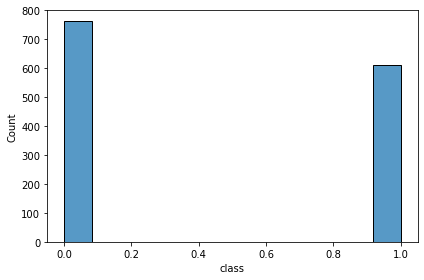

In [116]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df)
    plt.tight_layout()

<AxesSubplot:xlabel='class', ylabel='count'>

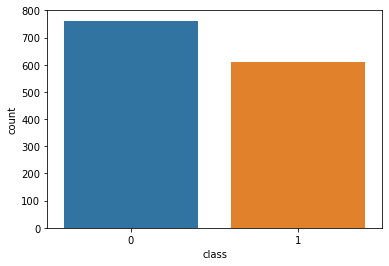

In [117]:
sns.countplot(x="class", data=df)   # 0 -indecates its not a Note  1 - indicates its a Note

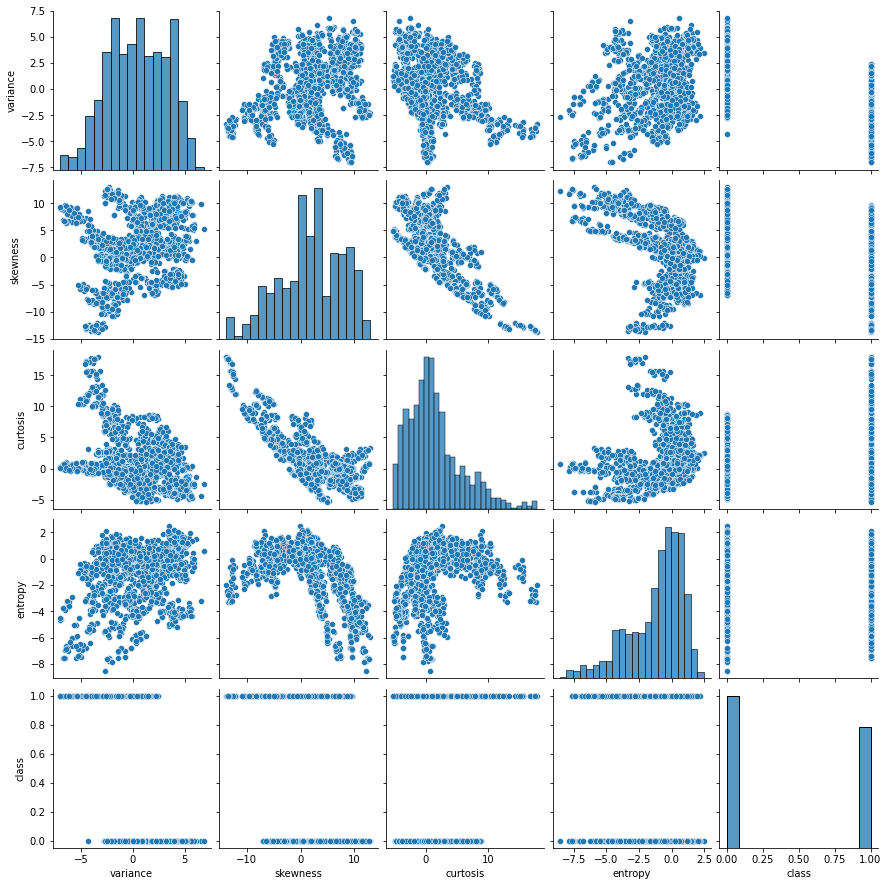

In [118]:
sns.pairplot(df)  # it give the relationship between the all variable by scattarplot

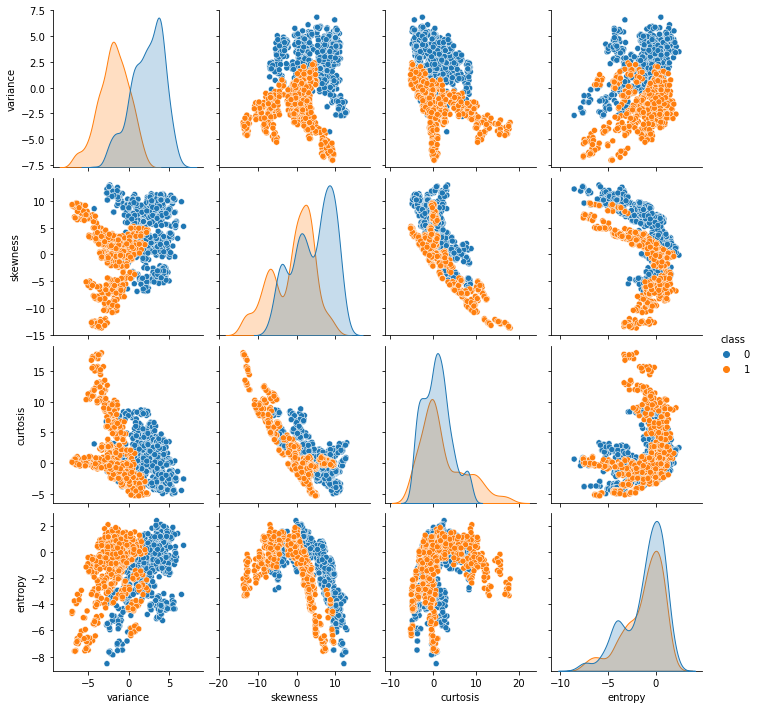

In [119]:
sns.pairplot(df,hue="class") # Coloring the variable based on catagorical variable CLASS

# Features selection

In [120]:
X = df.drop(["class"],axis=1)
Y = df["class"]

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y) #Defaultpercentage is 75 - 25 split 

In [122]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1029, 4)
(1029,)
(343, 4)
(343,)


In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [152]:
#Now apply standardization to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
#Building the sequential model with one input, hidden and output layer

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(1, activation='sigmoid'))

In [155]:
#Compling the model with binary_crossentrophy loss and adam optimizer

from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [156]:
#Fitting the model with the validation data of 25% for 200 epocs and batch size of 10

history = model.fit(X_train, Y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
103/103 [==============================] - 0s 518us/step - loss: 0.7993 - accuracy: 0.5413
Epoch 2/50
103/103 [==============================] - 0s 591us/step - loss: 0.6582 - accuracy: 0.6054
Epoch 3/50
103/103 [==============================] - 0s 554us/step - loss: 0.5682 - accuracy: 0.6900
Epoch 4/50
103/103 [==============================] - 0s 562us/step - loss: 0.4969 - accuracy: 0.8076
Epoch 5/50
103/103 [==============================] - 0s 551us/step - loss: 0.4324 - accuracy: 0.8591
Epoch 6/50
103/103 [==============================] - 0s 526us/step - loss: 0.3704 - accuracy: 0.8980
Epoch 7/50
103/103 [==============================] - 0s 476us/step - loss: 0.3104 - accuracy: 0.9223
Epoch 8/50
103/103 [==============================] - 0s 503us/step - loss: 0.2508 - accuracy: 0.9466
Epoch 9/50
103/103 [==============================] - 0s 549us/step - loss: 0.1991 - accuracy: 0.9660
Epoch 10/50
103/103 [==============================] - 0s 482us/step - loss: 0.161

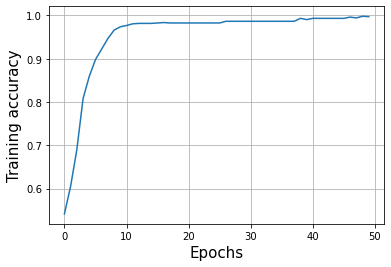

In [157]:
plt.plot(history.history['accuracy'])
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.show()

In [158]:
test_loss = model.evaluate(X_test, Y_test)
print("\nTest accuracy: ",test_loss[1])

11/11 [==============================] - 0s 603us/step - loss: 0.0243 - accuracy: 0.9942

Test accuracy:  0.9941691160202026


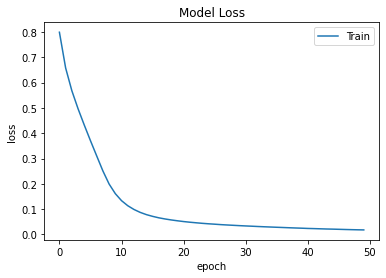

In [159]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [193]:

from sklearn.metrics import f1_score

In [203]:
predictions = model.predict(X_train)
predictions.shape

(1029, 1)

In [195]:
R_predictions= np.round(predictions)
R_predictions

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [196]:
accuracy = f1_score(Y_train, R_predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))


Accuracy: 99.78


In [197]:
from sklearn.metrics import classification_report

In [199]:
print('Classification Report:')
print(classification_report(Y_train, R_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00       461

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [200]:
## Predictions  For Unseen Data
# Evaluate on test data
predictions2 = model.predict(X_test)
predictions2

array([[9.95893002e-01],
       [1.60454874e-05],
       [9.96609926e-01],
       [9.86890852e-01],
       [1.28780912e-05],
       [1.69008963e-05],
       [8.59121919e-01],
       [1.91450119e-04],
       [6.43343265e-06],
       [1.18079743e-06],
       [9.88408804e-01],
       [8.48332882e-01],
       [9.98108745e-01],
       [7.14492217e-06],
       [1.20482464e-05],
       [3.11532617e-02],
       [5.02321091e-05],
       [2.16167291e-06],
       [1.55903319e-06],
       [6.84024644e-06],
       [9.80448365e-01],
       [2.70852979e-05],
       [2.72740763e-05],
       [2.66260922e-05],
       [9.98152077e-01],
       [9.94224012e-01],
       [9.96714354e-01],
       [5.02362490e-01],
       [9.91647601e-01],
       [9.33120012e-01],
       [1.81536325e-06],
       [9.99882579e-01],
       [9.96115446e-01],
       [2.84588600e-06],
       [1.67549610e-01],
       [3.85907106e-06],
       [2.94935980e-05],
       [9.92137432e-01],
       [9.90314901e-01],
       [3.85187835e-01],


In [202]:
R_predictions2= np.round(predictions2)
R_predictions2
R_predictions2.shape

(343, 1)

In [204]:
accuracy = f1_score(Y_test, R_predictions2)  
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(classification_report(Y_test, R_predictions2))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, R_predictions2))   

Accuracy: 99.33
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       0.99      0.99      0.99       149

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

Confusion Matrix:
[[193   1]
 [  1 148]]
